In [30]:
import numpy as np
import os,sys,math,copy, csv, pickle
from scipy.spatial import distance
from random import seed,random,randint
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.interpolate import spline
from scipy.interpolate import interp1d
%matplotlib inline  

seed(1234)
np.random.seed(1234)


def plot_value(dados):
    P = dados['P']
    pos = dados['ap'] == 1
    C = dados['C']
    x_sol = P[pos]
    plt.plot(C[:,0], C[:,1], 'bs', label='Hosts')
    plt.plot(x_sol[:,0], x_sol[:,1], 'ro', label='Pontos de Acesso')
    plt.legend(loc=1)
    plt.show()

def plot_y(value):
    plt.ylabel('Erro')
    plt.xlabel('Interações')
    plt.plot(value)
    plt.show()

def plot_value_err(values, errx, erry):
    x = np.linspace(min(values[:,0]), max(values[:,0]), num=50, endpoint=True)
    res = st.linregress(values[:,0], values[:,1])
    plt.plot(x, res.intercept + res.slope*x, 'r', label='Pareto')
    plt.errorbar(values[:,0],values[:,1], xerr=errx, yerr=erry, marker='o', markersize=8, linestyle='none')
    plt.show()
    
def plot_solution_f1f2(values):
    print(values.shape)
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.plot(values[:,0],values[:,1], 'bo')
    plt.show()
    


res [[ 915902.06515457 1025292.15701869]
 [ 903308.40347828  999249.03272549]
 [ 879455.09169453  975376.3038336 ]
 [ 899416.93571151  997647.29815444]
 [ 875730.44744066  983639.81115575]
 [ 908512.15182703 1007353.54199046]
 [ 952992.64480019 1060228.33102155]
 [ 912413.73000989  999223.12758988]
 [ 958492.8584277  1057381.10597057]
 [ 917705.4867458  1024681.42728751]]
errx [nan nan nan nan nan nan nan nan nan nan]
erry [nan nan nan nan nan nan nan nan nan nan]
(10, 2)


/home/jesimon/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1910: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
/home/jesimon/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1911: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


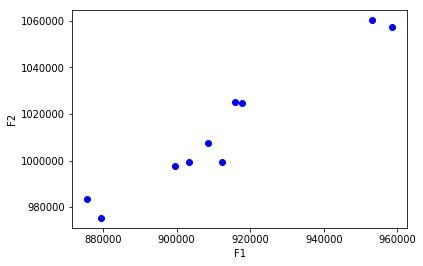

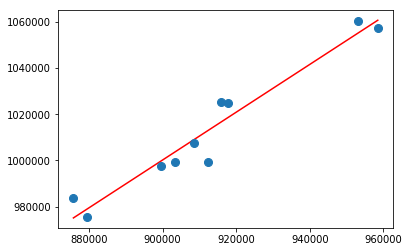

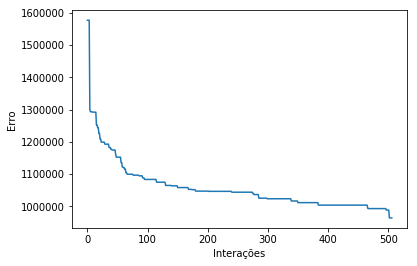

In [17]:
#dados pesos
file_sol = 'grid20/dict_result_10.csv'
#dados = pd.read_csv(file_sol)

#with open(file_sol) as csv_file:
#    reader = csv.reader(csv_file)
#    dados = dict(reader)
#with open('filename.pickle', 'rb') as handle:
#    b = pickle.load(handle)

#PW
res_pw1 =[[915902.06515457,1025292.15701869],
 [ 903308.40347828,999249.03272549],
 [ 879455.09169453,975376.3038336 ],
 [ 899416.93571151,997647.29815444],
 [ 875730.44744066,983639.81115575],
 [ 908512.15182703,1007353.54199046],
 [ 952992.64480019,1060228.33102155],
 [ 912413.73000989,999223.12758988],
 [ 958492.8584277,1057381.10597057],
 [ 917705.4867458,1024681.42728751]]

res_pw2 = [[ 915902.06515457, 1025292.15701869],
 [ 903308.40347828,  999249.03272549],
 [ 879455.09169453,  975376.3038336 ],
 [ 899416.93571151,  997647.29815444],
 [ 875730.44744066,  983639.81115575],
 [ 908512.15182703, 1007353.54199046],
 [ 952992.64480019, 1060228.33102155],
 [ 912413.73000989,  999223.12758988],
 [ 958492.8584277,  1057381.10597057],
 [ 917705.4867458,  1024681.42728751]]

y1 = np.array([1577205.60983076, 1577205.60983076, 1577205.60983076, 1577205.60983076, 1299582.52730073, 1293308.65181005, 1293308.65181005, 1293308.65181005, 1292292.86172786, 1292292.86172786, 1292292.86172786, 1291947.67524784, 1291947.67524784, 1291947.67524784, 1291947.67524784, 1252228.91746027, 1252228.91746027, 1244213.14455523, 1244213.14455523, 1226195.39153856, 1226195.39153856, 1208547.60537158, 1208547.60537158, 1199009.54820573, 1199009.54820573, 1199009.54820573, 1199009.54820573, 1199009.54820573, 1199009.54820573, 1192735.01838386, 1192735.01838386, 1192735.01838386, 1192735.01838386, 1192735.01838386, 1192735.01838386, 1192735.01838386, 1182265.93949168, 1182265.93949168, 1182265.93949168, 1177053.92577812, 1177053.92577812, 1174559.19079714, 1174559.19079714, 1174559.19079714, 1174559.19079714, 1174559.19079714, 1173970.09359876, 1160913.04601872, 1152357.75871401, 1152357.75871401, 1152357.75871401, 1152357.75871401, 1152357.75871401, 1152357.75871401, 1152357.75871401, 1152357.75871401, 1135475.69845511, 1135475.69845511, 1121788.01645018, 1121788.01645018, 1119834.27139499, 1119834.27139499, 1115436.65079492, 1115436.65079492, 1104463.28843028, 1104463.28843028, 1099491.06017487, 1099491.06017487, 1099491.06017487, 1099491.06017487, 1099491.06017487, 1099491.06017487, 1099491.06017487, 1099491.06017487, 1099491.06017487, 1099491.06017487, 1096478.80483379, 1096478.80483379, 1096478.80483379, 1096478.80483379, 1096478.80483379, 1096478.80483379, 1096478.80483379, 1096478.80483379, 1096478.80483379, 1096478.80483379, 1094396.1511161, 1094396.1511161, 1094396.1511161, 1094396.1511161, 1094396.1511161, 1094396.1511161, 1087880.58773035, 1087880.58773035, 1087880.58773035, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1083303.28410363, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1074661.68501354, 1064627.57493185, 1064627.57493185, 1064627.57493185, 1064627.57493185, 1064627.57493185, 1064627.57493185, 1064627.57493185, 1064627.57493185, 1064627.57493185, 1064627.57493185, 1063484.73892291, 1063484.73892291, 1063484.73892291, 1063484.73892291, 1063484.73892291, 1063484.73892291, 1063484.73892291, 1063484.73892291, 1063484.73892291, 1063484.73892291, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1058041.97602442, 1052439.04385036, 1052439.04385036, 1052439.04385036, 1052439.04385036, 1052439.04385036, 1052439.04385036, 1051467.78348405, 1051467.78348405, 1051467.78348405, 1051467.78348405, 1051467.78348405, 1051467.78348405, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046993.65417346, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1046304.22021814, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1043640.60836656, 1039543.75957428, 1039543.75957428, 1036357.97702234, 1036357.97702234, 1036357.97702234, 1036357.97702234, 1036357.97702234, 1036357.97702234, 1036357.97702234, 1036357.97702234, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1025155.53261332, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023314.78432913, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1023298.62290009, 1016344.62006934, 1016344.62006934, 1016344.62006934, 1016344.62006934, 1016344.62006934, 1016344.62006934, 1016344.62006934, 1016344.62006934, 1016344.62006934, 1016344.62006934, 1016344.62006934, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1011271.86695413, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 1003544.09036045, 993658.79197592, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 992796.35610966, 988073.42852769, 988073.42852769, 988073.42852769, 988073.42852769, 988073.42852769, 963856.54668757, 963856.54668757, 963856.54668757, 963856.54668757, 963856.54668757])




pw = np.array([res_pw1,res_pw2])

def calc_res(values):
    res = []
    errx = []
    erry = []
    for i in range(int(values.shape[1])):
        vec0 = values[:,i,0]
        vec1 = values[:,i,1]
        mn0 = np.mean(vec0)
        mn1 = np.mean(vec1)
        err0 = st.t.interval(0.9, len(vec0) - 1, loc=np.mean(vec0), scale=st.sem(vec0))
        err1 = st.t.interval(0.9, len(vec1) - 1, loc=np.mean(vec1), scale=st.sem(vec1))
        res.append([mn0,mn1])
        errx.append(mn0 - err0[0])
        erry.append(mn1 - err1[0])
    return np.array(res), np.array(errx), np.array(erry)

res, errx, erry = calc_res(pw)
print('res {}'.format(res))
print('errx {}'.format(errx))
print('erry {}'.format(erry))

plot_solution_f1f2(res)
plot_value_err(res, errx, erry)
plot_y(y1)

#res_pw2 = 
#y2 = 

(10, 2)


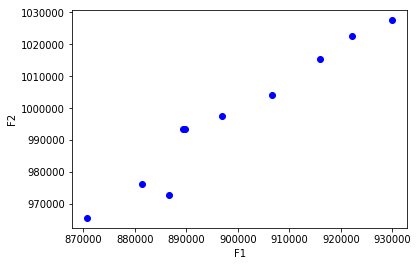

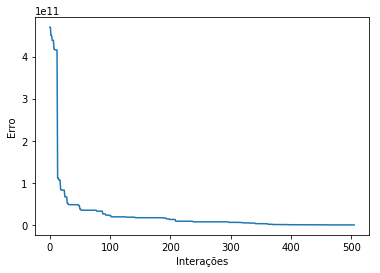

In [18]:
#Pf1
res1_pef1 = np.array([[ 915947.81633878,1015557.83787488],
 [ 897000.6814353,997646.85872094],
 [ 929901.71077063,1027548.1241426],
 [ 870790.18487631,965611.92886424],
 [ 922085.65583343,1022562.21934177],
 [ 906728.56481664,1004047.99609416],
 [ 881388.30220225,976244.7964178 ],
 [ 889679.74311761,993607.47943411],
 [ 889412.71228356,993600.56692427],
 [ 886631.39139481,972828.27170833]])

y1_e1 = np.array([469650308259.0713, 469650308259.0713, 450169079961.59576, 450169079961.59576, 438440824705.86035, 438440824705.86035, 438440824705.86035, 417052464763.3298, 417052464763.3298, 415771632263.4917, 415771632263.4917, 415771632263.4917, 415771632263.4917, 111615782408.45636, 111615782408.45636, 106840487357.57932, 106840487357.57932, 106213304167.76012, 83680284966.1507, 83680284966.1507, 82447634227.61342, 82447634227.61342, 82447634227.61342, 82447634227.61342, 82447634227.61342, 66788062604.788155, 66788062604.788155, 66788062604.788155, 66788062604.788155, 51072283715.06193, 51072283715.06193, 48471390206.22927, 48471390206.22927, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 48028697991.50037, 46115739040.948265, 46115739040.948265, 37331539131.79957, 37331539131.79957, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 34899581039.82196, 32647258387.12575, 32647258387.12575, 32647258387.12575, 32647258387.12575, 32647258387.12575, 32647258387.12575, 32647258387.12575, 32647258387.12575, 32647258387.12575, 32647258387.12575, 26226555170.409996, 26226555170.409996, 26047654111.39586, 26047654111.39586, 26047654111.39586, 23288806309.040516, 23288806309.040516, 23288806309.040516, 23288806309.040516, 23288806309.040516, 23288806309.040516, 22149577343.53707, 22149577343.53707, 22149577343.53707, 19227601609.37058, 19227601609.37058, 19227601609.37058, 19227601609.37058, 19227601609.37058, 19227601609.37058, 19227601609.37058, 19227601609.37058, 19227601609.37058, 19227601609.37058, 19227601609.37058, 19227601609.37058, 19117224263.970825, 19117224263.970825, 19117224263.970825, 19117224263.970825, 19117224263.970825, 19117224263.970825, 19117224263.970825, 19117224263.970825, 19117224263.970825, 19117224263.970825, 19117224263.970825, 19117224263.970825, 19117224263.970825, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 18420746663.338966, 17618234352.50137, 17618234352.50137, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 17075958372.321157, 16126294350.64314, 16126294350.64314, 16126294350.64314, 16126294350.64314, 16126294350.64314, 14300955422.917389, 14300955422.917389, 14300955422.917389, 14300955422.917389, 14300955422.917389, 12937069245.21267, 12937069245.21267, 12937069245.21267, 12937069245.21267, 12937069245.21267, 12937069245.21267, 12937069245.21267, 12937069245.21267, 12937069245.21267, 12937069245.21267, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 8673469818.644281, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7294635709.553853, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 7284785829.332137, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 6036165455.157351, 5641648653.758572, 5641648653.758572, 5641648653.758572, 5641648653.758572, 5641648653.758572, 5641648653.758572, 4810937348.432938, 4810937348.432938, 4810937348.432938, 4810937348.432938, 4810937348.432938, 4810937348.432938, 4810937348.432938, 4810937348.432938, 4810937348.432938, 4810937348.432938, 4379545210.837902, 4379545210.837902, 4379545210.837902, 4379545210.837902, 4379545210.837902, 4379545210.837902, 4379545210.837902, 4379545210.837902, 4379545210.837902, 4379545210.837902, 3064984440.307543, 3064984440.307543, 3064984440.307543, 3064984440.307543, 3064984440.307543, 3064984440.307543, 3064984440.307543, 3064984440.307543, 3064984440.307543, 3064984440.307543, 3064984440.307543, 3064984440.307543, 3064984440.307543, 2841780260.8181643, 2841780260.8181643, 2841780260.8181643, 2789240142.713112, 2789240142.713112, 2789240142.713112, 2789240142.713112, 2789240142.713112, 1537299502.3571832, 1537299502.3571832, 1537299502.3571832, 1537299502.3571832, 1537299502.3571832, 1537299502.3571832, 1537299502.3571832, 1537299502.3571832, 921569684.8050977, 921569684.8050977, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 791117158.9409368, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 475793679.1457525, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 212015090.0484116, 1179783.7654245414, 1179783.7654245414, 1179783.7654245414, 1179783.7654245414, 1179783.7654245414, 1179783.7654245414, 1179783.7654245414, 1179783.7654245414, 1179783.7654245414, 1179783.7654245414, 1179783.7654245414, 1179783.7654245414, 907157.1985876394, 907157.1985876394, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 896570.4979595009, 886631.3913948103, 886631.3913948103, 886631.3913948103, 886631.3913948103, 886631.3913948103, 886631.3913948103, 886631.3913948103, 886631.3913948103, 886631.3913948103])
plot_solution_f1f2(res1_pef1)
plot_y(y1_e1)

(10, 2)


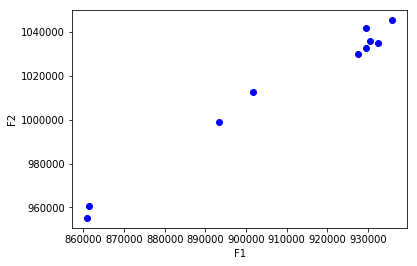

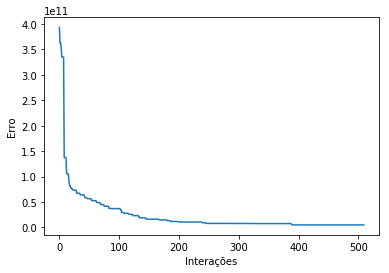

In [19]:
#Pf2
res1_pef2 = np.array([[ 930611.54844913, 1036090.79126152],
 [ 932350.41253414, 1034962.44973618],
 [ 893341.16677262, 998946.63212219],
 [ 860970.80475071, 955191.37781909],
 [ 927511.08569008, 1029851.40515611],
 [ 861287.57610731, 960652.88037392],
 [ 929534.90817596, 1032810.91354863],
 [ 929626.84110731, 1041776.52459169],
 [ 901595.864991, 1012547.02805487],
 [ 935848.35713679, 1045346.45374865]])

y1_e2 = np.array([393805240488.47986, 362648680051.07733, 362648680051.07733, 352863427785.365, 335193484949.06665, 335193484949.06665, 335193484949.06665, 335193484949.06665, 137506793572.45178, 137506793572.45178, 137506793572.45178, 137506793572.45178, 105732729275.68561, 105732729275.68561, 104738906516.43251, 104738906516.43251, 90939962776.31964, 82096120621.64214, 82096120621.64214, 77359637141.42859, 77359637141.42859, 75158993598.84518, 75158993598.84518, 73003664607.52737, 73003664607.52737, 73003664607.52737, 73003664607.52737, 73003664607.52737, 73003664607.52737, 67005837312.00789, 67005837312.00789, 67005837312.00789, 67005837312.00789, 67005837312.00789, 67005837312.00789, 63875681389.88601, 63875681389.88601, 63875681389.88601, 63875681389.88601, 63875681389.88601, 63875681389.88601, 63875681389.88601, 60706339562.16444, 58050527557.4301, 58050527557.4301, 58050527557.4301, 57827735257.25532, 56255060019.07947, 56255060019.07947, 56255060019.07947, 56255060019.07947, 56255060019.07947, 56255060019.07947, 56255060019.07947, 52743098582.012764, 52743098582.012764, 52438796836.50916, 52438796836.50916, 52438796836.50916, 52438796836.50916, 52438796836.50916, 52438796836.50916, 49117766071.66182, 49117766071.66182, 48639862456.99697, 48639862456.99697, 48639862456.99697, 48639862456.99697, 48639862456.99697, 44633550041.4772, 44633550041.4772, 44633550041.4772, 44633550041.4772, 44633550041.4772, 44633550041.4772, 41536987239.8314, 41536987239.8314, 41536987239.8314, 41536987239.8314, 41536987239.8314, 41536987239.8314, 41536987239.8314, 41536987239.8314, 37143131827.44246, 37143131827.44246, 37143131827.44246, 37143131827.44246, 37143131827.44246, 37143131827.44246, 36842105844.95366, 36842105844.95366, 36842105844.95366, 36842105844.95366, 36842105844.95366, 36842105844.95366, 36842105844.95366, 36842105844.95366, 36842105844.95366, 36842105844.95366, 36842105844.95366, 36842105844.95366, 36842105844.95366, 34835953028.87643, 34835953028.87643, 29409930186.991497, 29409930186.991497, 29102878186.053288, 29102878186.053288, 27714203295.00961, 27714203295.00961, 27714203295.00961, 27714203295.00961, 27714203295.00961, 27714203295.00961, 27714203295.00961, 27456252199.442352, 25886613714.652336, 25506283861.04213, 25506283861.04213, 25506283861.04213, 25506283861.04213, 25506283861.04213, 25506283861.04213, 22988728337.377075, 22988728337.377075, 22988728337.377075, 22988728337.377075, 22988728337.377075, 22988728337.377075, 22988728337.377075, 22988728337.377075, 22988728337.377075, 22988728337.377075, 19674423997.672817, 19674423997.672817, 18629910858.63485, 18629910858.63485, 18629910858.63485, 18629910858.63485, 18629910858.63485, 18629910858.63485, 18629910858.63485, 18629910858.63485, 18629910858.63485, 18629910858.63485, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 16013775369.028896, 15853414406.065071, 15853414406.065071, 14658645281.999823, 14658645281.999823, 14658645281.999823, 14658645281.999823, 14658645281.999823, 14658645281.999823, 14658645281.999823, 14515649364.80402, 14515649364.80402, 14515649364.80402, 14515649364.80402, 14515649364.80402, 14515649364.80402, 13101673809.233976, 13101673809.233976, 13101673809.233976, 13101673809.233976, 13101673809.233976, 13101673809.233976, 11539334503.055689, 11539334503.055689, 11539334503.055689, 11478265596.432272, 11478265596.432272, 11478265596.432272, 11478265596.432272, 11478265596.432272, 11478265596.432272, 11478265596.432272, 11478265596.432272, 11478265596.432272, 11478265596.432272, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 10401558310.081509, 8992199679.981443, 8992199679.981443, 8992199679.981443, 8992199679.981443, 8992199679.981443, 8992199679.981443, 8046192855.486637, 8046192855.486637, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7653953440.634955, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7584286659.37252, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7505485176.287023, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 7347238356.655774, 6130394871.451367, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244, 4708426452.891244])
plot_solution_f1f2(res1_pef2)
plot_y(y1_e2)

In [20]:
file_sol = 'grid20/result_c_f2.pkl'
with open(file_sol, 'rb') as handle:
    b = pickle.load(handle)

b.keys()

dict_keys(['d', 'C', 'cc', 'P', 'cp', 'rp', 'N', 'n_max', 'ap', 'acp', 'grid', 'sizex', 'sizey', 'y', 'fval'])

In [21]:
#função que será otimizada
def f1(dados):
    ap = dados['ap']

    # Calcula o valor da função objetivo f1
    f1 = sum(ap)

    # valor de f1 penalizada pelos valores das restrições
    f1_penal = f1 + 10 * (rest3(dados) + rest4(dados) + rest5(dados) + rest6(dados) + rest7(dados))

    return f1_penal

def f2(dados):
    acp = dados['acp']
    rp = dados['rp']
    d = dados['d']
    P = dados['P']
    
    #Calcula o valor da função objetivo f2
    f2_value = 0
    for id_c,c in enumerate(C):
        for id_p,p in enumerate(P):
            f2_value += d[id_c, id_p] * acp[id_c][id_p]
    
    #valor de f2 penalizada pelos valores das restrições
    f2_penal = f2_value + 10 * (rest3(dados) + rest4(dados) + rest5(dados) + rest6(dados) + rest7(dados))

    return f2_penal

def rest3(dados):
    N = dados['N']
    C = dados['C']
    acp = dados['acp']

    penal = N * len(C) - acp.sum()
    penal = max(0, penal) ** 2
    return penal

# Garante nao estourar a capacidade do ponto de acesso
def rest4(dados):
    acp = dados['acp']
    cc = dados['cc']
    cp = dados['cp']

    pontos_cap = np.matmul(acp.transpose(), cc) - cp

    # soma somente os pontos que nao obedecem a restricao
    penal = 0
    for i in pontos_cap:
        if (i > 0):
            penal += i

    return penal

# garante que cada cliente estará conectado a no maximo 1 PA
def rest5(dados):
    acp = dados['acp']

    pert = acp.sum(axis=1) - 1
    penal = 0
    for i in pert:
        if (i > 0):
            penal += i
    return penal

# garante que nao exceda o numero de pontos de acesso
def rest6(dados):
    ap = dados['ap']
    n_max = dados['n_max']

    penal = np.sum(ap) - n_max
    penal = max(0, penal) ** 2

    return penal

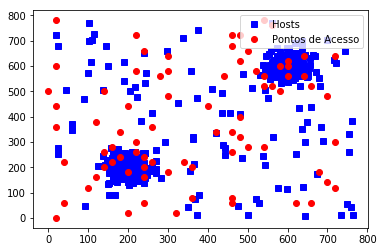

Número de APs utilizados: 79
Valor restrição 3: 22515.002499999988
Valor restrição 4: 0
Valor restrição 5: 0
Valor restrição 6: 0


In [31]:
file_sol = 'grid20/result_c_f2.pkl'
with open(file_sol, 'rb') as handle:
    b = pickle.load(handle)


plot_value(b)

print('Número de APs utilizados: {}'.format(int(np.sum(b['ap']))))
print('Valor restrição 3: {}'.format(rest3(b)))
print('Valor restrição 4: {}'.format(rest4(b)))
print('Valor restrição 5: {}'.format(rest5(b)))
print('Valor restrição 6: {}'.format(rest6(b)))


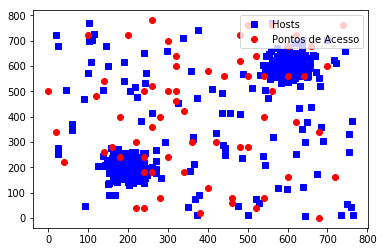

Número de APs utilizados: 65
Valor restrição 3: 24040.502499999984
Valor restrição 4: 0
Valor restrição 5: 0
Valor restrição 6: 0


In [32]:
file_sol = 'grid20/result_c_f1.pkl'
with open(file_sol, 'rb') as handle:
    b = pickle.load(handle)


plot_value(b)

print('Número de APs utilizados: {}'.format(int(np.sum(b['ap']))))
print('Valor restrição 3: {}'.format(rest3(b)))
print('Valor restrição 4: {}'.format(rest4(b)))
print('Valor restrição 5: {}'.format(rest5(b)))
print('Valor restrição 6: {}'.format(rest6(b)))


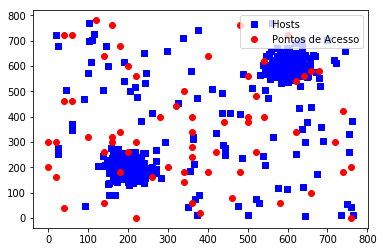

Número de APs utilizados: 65
Valor restrição 3: 22816.102499999986
Valor restrição 4: 0
Valor restrição 5: 0
Valor restrição 6: 0


In [34]:
file_sol = 'grid20/result_c.pkl'

with open(file_sol, 'rb') as handle:
    b = pickle.load(handle)


plot_value(b)

print('Número de APs utilizados: {}'.format(int(np.sum(b['ap']))))
print('Valor restrição 3: {}'.format(rest3(b)))
print('Valor restrição 4: {}'.format(rest4(b)))
print('Valor restrição 5: {}'.format(rest5(b)))
print('Valor restrição 6: {}'.format(rest6(b)))